# Project Topic: 
Crisk prediction + customer segmentation and default rate forecasting


# Preprocessing Methods


This dataset contains detailed financial and demographic information of loan applicants, including credit amount, income, employment history, and housing conditions. It also includes loan performance indicators such as default status, making it highly suitable for projects involving credit risk prediction, customer segmentation, and default rate forecasting. The data is rich, structured, and includes both numerical and categorical variables, allowing for comprehensive analysis using supervised and unsupervised machine learning techniques. This makes it ideal for building industry-level models and visualizations in BI tools like Power BI.

The preprocessing of this dataset involved essential data cleaning and transformation steps to prepare it for analysis. This included checking data types, handling missing values, removing duplicate and constant columns, and standardizing numerical features. Categorical variables were encoded appropriately, and outliers were addressed to improve model performance. These steps ensure the dataset is clean, consistent, and ready for effective machine learning modeling and insightful BI visualization.

# Importing libraries

In [93]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

# Load the dataset

In [96]:
file_path = 'Merge_Dataset.xlsx'
df = pd.read_excel(file_path)

# Initial Exploration

In [98]:
print(df.shape)

(1000, 115)


In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 115 entries, SK_ID_CURR to AMT_PAYMENT_TOTAL_CURRENT
dtypes: float64(63), int64(37), object(15)
memory usage: 898.6+ KB
None


In [103]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_INSTALMENT,AMT_PAYMENT,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,MONTHS_BALANCE.1,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_PAYMENT_TOTAL_CURRENT
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1.000000e+03,1000.0,1000.0,...,0.0,0.0,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,215354.0,0.0,0.0,270000.0,720000.0,21181.5,720000.0,2.866300e-02,-17520.0,-939.0,...,NaN,NaN,-15.30000,34.140000,25.710000,-16.102000,244267.632585,450000.0,75348.000000,90473.702265
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.768807e-16,0.0,0.0,...,NaN,NaN,6.16344,19.758816,15.349316,9.378355,155297.513298,0.0,106657.426852,123573.157272
min,215354.0,0.0,0.0,270000.0,720000.0,21181.5,720000.0,2.866300e-02,-17520.0,-939.0,...,NaN,NaN,-24.00000,6.000000,5.000000,-29.000000,1345.500000,450000.0,0.000000,0.000000
25%,215354.0,0.0,0.0,270000.0,720000.0,21181.5,720000.0,2.866300e-02,-17520.0,-939.0,...,NaN,NaN,-24.00000,6.000000,5.000000,-24.000000,129216.735000,450000.0,0.000000,0.000000
50%,215354.0,0.0,0.0,270000.0,720000.0,21181.5,720000.0,2.866300e-02,-17520.0,-939.0,...,NaN,NaN,-12.00000,48.000000,30.000000,-20.000000,191860.920000,450000.0,0.000000,10907.235000
75%,215354.0,0.0,0.0,270000.0,720000.0,21181.5,720000.0,2.866300e-02,-17520.0,-939.0,...,NaN,NaN,-10.00000,48.000000,42.000000,-5.000000,407511.405000,450000.0,135000.000000,193421.475000
max,215354.0,0.0,0.0,270000.0,720000.0,21181.5,720000.0,2.866300e-02,-17520.0,-939.0,...,NaN,NaN,-10.00000,48.000000,42.000000,-2.000000,440171.190000,450000.0,279000.000000,321018.570000


In [105]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_PAYMENT,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,MONTHS_BALANCE.1,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_PAYMENT_TOTAL_CURRENT
0,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-22,424505.025,450000,279000,10907.235
1,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-19,133842.150,450000,0,0.000
2,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-24,146877.660,450000,135000,193421.475
3,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-21,440171.190,450000,0,0.000
4,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-3,370571.985,450000,270000,2040.435


In [107]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_PAYMENT,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,MONTHS_BALANCE.1,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_PAYMENT_TOTAL_CURRENT
995,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-29,1345.500,450000,135000,137025.00
996,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-25,191860.920,450000,0,4950.00
997,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-7,383473.665,450000,0,13500.00
998,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-20,129216.735,450000,9000,314881.47
999,215354,0,Cash loans,F,0,270000,720000,21181.5,720000,Unaccompanied,...,NaN,-12,48,30,Active,-2,407511.405,450000,0,0.00


#  Check for missing values


In [110]:
print(df.isnull().sum())

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE           0
CODE_GENDER                  0
CNT_CHILDREN                 0
                            ..
MONTHS_BALANCE.1             0
AMT_BALANCE                  0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_DRAWINGS_ATM_CURRENT     0
AMT_PAYMENT_TOTAL_CURRENT    0
Length: 115, dtype: int64


# Visualize missing values


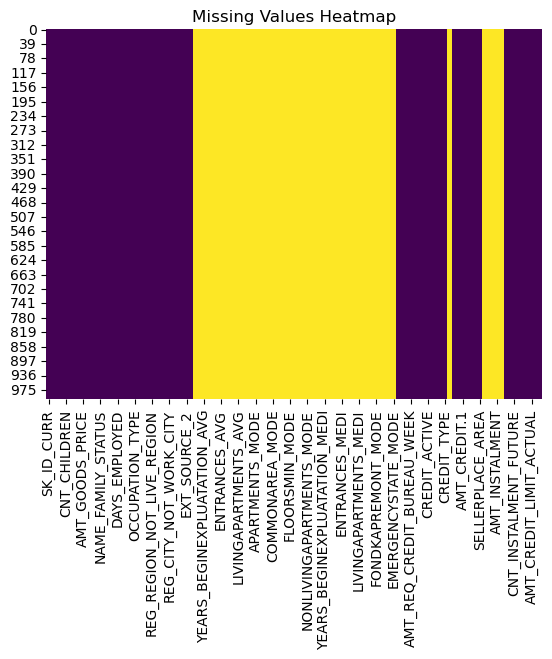

In [113]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Handling missing values



In [116]:
# You can customize strategies: mean, median, mode, drop, etc.

df = df.dropna(axis=0, how='all')  # drop rows where all values are NaN
df = df.dropna(axis=1, how='all')  # drop columns where all values are NaN

In [118]:
# Example: Fill numeric columns with median

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [120]:
# Example: Fill categorical columns with mode

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#  Handle duplicates


In [123]:
df = df.drop_duplicates()

# Fix data types


In [126]:
# Example: convert date columns
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

#  Encode categorical variables


In [129]:
# Label Encoding (for binary or ordinal)
label_enc = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = label_enc.fit_transform(df[col])

In [131]:
# One-Hot Encoding (for nominal variables)
df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2], drop_first=True)


#  Feature Scaling


In [134]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [144]:
#Handle Skewed Features
skewed = df[numeric_cols].skew().sort_values(ascending=False)
high_skew = skewed[skewed > 1].index
df[high_skew] = np.log1p(df[high_skew])

# Outlier Detection (IQR method)


In [137]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers(df, numeric_cols)

In [176]:
# Replace df with only selected numeric columns + other necessary non-numeric columns if needed
df = pd.concat([df[selected_features], df.drop(columns=numeric_df.columns)], axis=1)

#  Final check


In [140]:
print(df.shape)


(901, 63)


In [142]:
print(df.describe(include='all'))


        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
count        901.0   901.0                901         901         901.0   
unique         NaN     NaN                  1           1           NaN   
top            NaN     NaN         Cash loans           F           NaN   
freq           NaN     NaN                901         901           NaN   
mean           0.0     0.0                NaN         NaN           0.0   
std            0.0     0.0                NaN         NaN           0.0   
min            0.0     0.0                NaN         NaN           0.0   
25%            0.0     0.0                NaN         NaN           0.0   
50%            0.0     0.0                NaN         NaN           0.0   
75%            0.0     0.0                NaN         NaN           0.0   
max            0.0     0.0                NaN         NaN           0.0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
count              901.0     

In [69]:
print(df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0         0.0     0.0         Cash loans           F           0.0   
1         0.0     0.0         Cash loans           F           0.0   
2         0.0     0.0         Cash loans           F           0.0   
3         0.0     0.0         Cash loans           F           0.0   
4         0.0     0.0         Cash loans           F           0.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0               0.0         0.0          0.0              0.0   Unaccompanied   
1               0.0         0.0          0.0              0.0   Unaccompanied   
2               0.0         0.0          0.0              0.0   Unaccompanied   
3               0.0         0.0          0.0              0.0   Unaccompanied   
4               0.0         0.0          0.0              0.0   Unaccompanied   

   ... CNT_INSTALMENT CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  \
0  ...        0.70181   